In [23]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [2]:
#Loading MNIST dataset
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

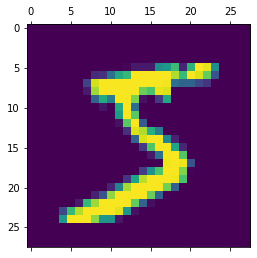

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4701 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9206
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2732 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2667 - accuracy: 0.9264


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9261


[0.26622509956359863, 0.9261000156402588]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([2.1731049e-02, 4.9054535e-07, 5.9321553e-02, 9.5387948e-01,
       2.4293363e-03, 1.3390440e-01, 2.5586912e-06, 9.9981856e-01,
       1.0927379e-01, 6.9035459e-01], dtype=float32)

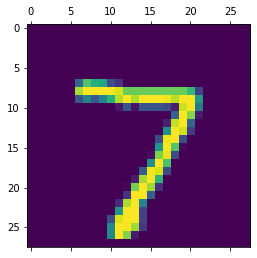

In [17]:
plt.matshow(X_test[0])

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    0,    2,    0,    5,   10,    3,    3,    1],
       [   0, 1110,    3,    2,    0,    1,    4,    2,   13,    0],
       [   5,    9,  915,   19,    8,    5,   13,   11,   43,    4],
       [   3,    0,   16,  917,    1,   24,    3,   10,   29,    7],
       [   1,    1,    3,    1,  917,    0,   11,    3,   10,   35],
       [   7,    3,    2,   34,    9,  773,   17,    5,   35,    7],
       [   7,    3,    5,    0,    7,   11,  917,    2,    6,    0],
       [   1,    5,   21,    6,    9,    1,    0,  950,    4,   31],
       [   5,    5,    6,   17,    9,   19,    9,   11,  887,    6],
       [  10,    6,    1,    9,   26,    6,    0,   22,   10,  919]])>

Text(69.0, 0.5, 'Truth')

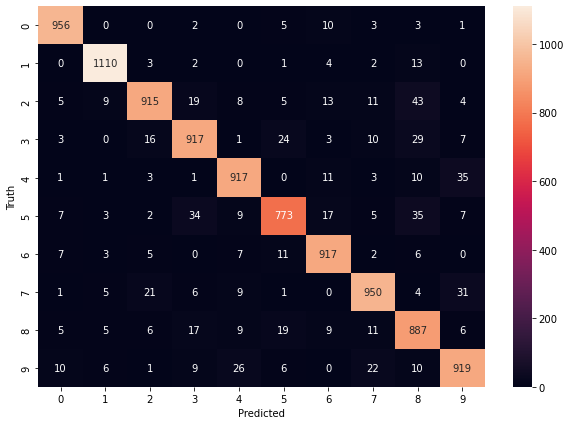

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using hidden layer

In [23]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2750 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1262 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0871 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0664 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - accuracy: 0.9844


In [24]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9742


[0.08449578285217285, 0.9742000102996826]

Text(69.0, 0.5, 'Truth')

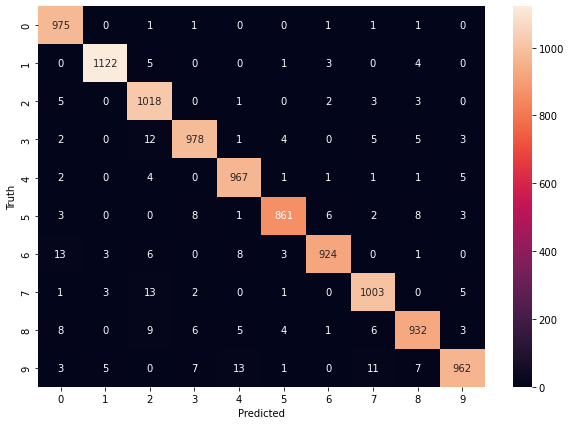

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2775 - accuracy: 0.9204
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1254 - accuracy: 0.9634
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0876 - accuracy: 0.9738
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0673 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0422 - accuracy: 0.9873
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0345 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0283 - accuracy: 0.9915
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0238 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.019

In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0957 - accuracy: 0.9725


[0.09569527953863144, 0.9725000262260437]

## CNN model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [38]:
model=Sequential()
#adding convolution layer
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(16,(3,3),activation='relu'))
#adding pooling layer
#model.add(BatchNormalization(axis = 3, name = 'bn0'))
model.add(MaxPool2D(4,4))
#adding fully connected layer
#model.add(Conv2D(16,(3,3),activation='relu'))
#model.add(Conv2D(16,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(20,activation='relu'))
#adding output layer
model.add(Dense(10,activation='sigmoid'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#fitting the model
model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2524 - accuracy: 0.9190
Epoch 2/5
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0766 - accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0585 - accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0473 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0418 - accuracy: 0.9870


In [39]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.0455 - accuracy: 0.9858


[0.04546002298593521, 0.98580002784729]

Text(69.0, 0.5, 'Truth')

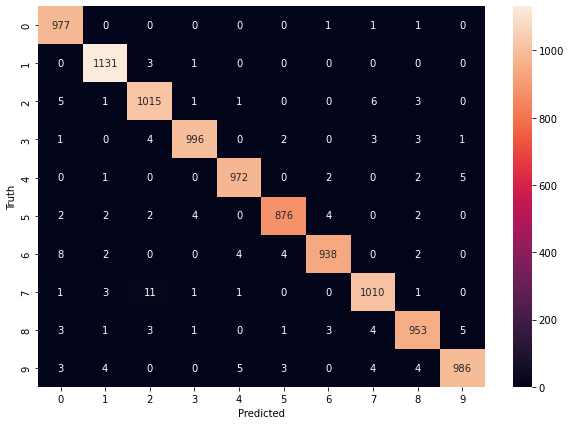

In [40]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')